In [15]:
import pandas as pd
import talib
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pykrx import stock


## 함수 추가

In [3]:
# 이동평균선 구하기
def get_MA(x):
    """
    종목에 대한 DataFrame 형식의 OHLCV를 받아와 14일, 30일, 50일, 200일, 1000일 SMA를 반환하는 함수입니다.
    """
    try:
        for n in [14, 30, 50, 200, 1000]:
            x['ma' + str(n)] = talib.SMA(x['close'].values,
                                        timeperiod = n) 
    except:
        x = x.astype('float64')
        for n in [14, 30, 50, 200, 1000]:
            x['ma' + str(n)] = talib.SMA(x['close'].values,
                                        timeperiod = n) 
    return x

In [225]:
# 이동평균선 구하기
def get_MA(x):
    """
    종목에 대한 DataFrame 형식의 OHLCV를 받아와 14일, 30일, 50일, 200일, 1000일 SMA를 반환하는 함수입니다.
    """
    try:
        for n in [14, 30, 50, 200, 1000]:
            x['ma' + str(n)] = talib.SMA(x['close'].values,
                                        timeperiod = n) / x['close']
    except:
        x = x.astype('float64')
        for n in [14, 30, 50, 200, 1000]:
            x['ma' + str(n)] = talib.SMA(x['close'].values,
                                        timeperiod = n) / x['close']
    return x

In [4]:
# RSI 구하기
def get_RSI(x):
    """
    종목에 대한 DataFrame 형식의 OHLCV를 받아와 14일, 30일, 50일, 200일 RSI를 반환하는 함수입니다.
    """
    try:
        for n in [14, 30, 50, 200]:
            x['RSI' + str(n)] = talib.RSI(x['close'].values,
                                    timeperiod = n)     
    except:
        x = x.astype('float64')
        for n in [14, 30, 50, 200]:
            x['RSI' + str(n)] = talib.RSI(x['close'].values,
                                        timeperiod = n)     
    return x

In [5]:
# MDD 구하기

def get_mdd(x):
    input_buy = input("매수날짜: yyyy-mm-dd")
    input_sell = input("매도날짜: yyyy-mm-dd")
    buy = datetime.strptime(input_buy,'%Y-%m-%d')
    sell = datetime.strptime(input_sell,'%Y-%m-%d')
    x['date_temp'] = x['date'].astype('datetime64')
    cond1 = x['date_temp']>= buy
    cond2 = x['date_temp']<= sell
    x_mdd = x.loc[cond1 & cond2]
    저가 = x_mdd['low'].min() #최저점
    index = x_mdd[x_mdd['low'] == x_mdd['low'].min()].index
    print(index)
    # 저가 기준 전고점 구하기
    전고점기간 = x_mdd.loc[:index[0], :]
    전고점 = 전고점기간['high'].max()
    # MDD 계산
    mdd = round((저가 - 전고점) / 전고점, 4) * 100
    x.drop(columns=['date_temp'],inplace=True)
    
    return f'MDD = {mdd}%'
    

In [6]:
# MDD 구하기

def get_mdd_5(x):
    buy = datetime.strptime('2017-09-01','%Y-%m-%d')
    sell = datetime.strptime('2022-09-01','%Y-%m-%d')
    x['date_temp'] = x['date'].astype('datetime64')
    cond1 = x['date_temp']>= buy
    cond2 = x['date_temp']<= sell
    x_mdd = x.loc[cond1 & cond2]
    저가 = x_mdd['low'].min() #최저점
    index = x_mdd[x_mdd['low'] == x_mdd['low'].min()].index
    print(index)
    # 저가 기준 전고점 구하기
    전고점기간 = x_mdd.loc[:index[0], :]
    전고점 = 전고점기간['high'].max()
    # MDD 계산
    mdd = round((저가 - 전고점) / 전고점, 4) * 100
    x.drop(columns=['date_temp'],inplace=True)
    
    return mdd
    

In [7]:
# MDD 구하기

def get_mdd_10(x):
    buy = datetime.strptime('2012-09-01','%Y-%m-%d')
    sell = datetime.strptime('2022-09-01','%Y-%m-%d')
    x['date_temp'] = x['date'].astype('datetime64')
    cond1 = x['date_temp']>= buy
    cond2 = x['date_temp']<= sell
    x_mdd = x.loc[cond1 & cond2]
    저가 = x_mdd['low'].min() #최저점
    index = x_mdd[x_mdd['low'] == x_mdd['low'].min()].index
    print(index)
    # 저가 기준 전고점 구하기
    전고점기간 = x_mdd.loc[:index[0], :]
    전고점 = 전고점기간['high'].max()
    # MDD 계산
    mdd = round((저가 - 전고점) / 전고점, 4) * 100
    x.drop(columns=['date_temp'],inplace=True)
    
    return mdd
    

In [7]:
# MDD 구하기

def get_mdd_200(x):
    buy = datetime.strptime('2018-10-22','%Y-%m-%d')
    sell = datetime.strptime('2022-09-01','%Y-%m-%d')
    x['date_temp'] = x['date'].astype('datetime64')
    cond1 = x['date_temp']>= buy
    cond2 = x['date_temp']<= sell
    x_mdd = x.loc[cond1 & cond2]
    저가 = x_mdd['low'].min() #최저점
    index = x_mdd[x_mdd['low'] == x_mdd['low'].min()].index
    print(index)
    # 저가 기준 전고점 구하기
    전고점기간 = x_mdd.loc[:index[0], :]
    전고점 = 전고점기간['high'].max()
    # MDD 계산
    mdd = round((저가 - 전고점) / 전고점, 4) * 100
    x.drop(columns=['date_temp'],inplace=True)
    
    return mdd
    

In [8]:
# 베타 구하기
def get_beta(x, y):
    """
    특정 종목과 시장지수를 DataFrame형식으로 받아 시장지수 대비 특정 종목의 베타값을 반환합니다.
    x에 특정종목, y에 시장지수 인덱스를 입력합니다.
    """
    data = pd.concat([x['close'].reset_index(drop=True),y['close'].reset_index(drop=True)],axis=1)
    daily_return = np.log(data/data.shift(1))
    cov = daily_return.cov()*250
    cov_market = cov.iloc[0,1]
    market_var = daily_return.iloc[:,1].var() *250
    beta = cov_market / market_var
    return round(beta,3)

In [9]:
# 상관계수 구하기
def get_corr(x,y):
    """
    특정 두 종목을 DataFrame형식으로 받아 두 종목 간의 상관계수를 반환합니다.
    """
    data = pd.concat([x['close'].reset_index(drop=True),y['close'].reset_index(drop=True)],axis=1)
    daily_return = np.log(data/data.shift(1))
    corr = daily_return.corr().iloc[1,0]
    return round(corr,3)

In [36]:
df_kospi_200 = stock.get_index_ohlcv("20181022", "20220901", "1028").reset_index()
temp = df_kospi_200.reset_index()
temp['sector_name'] = stock.get_index_ticker_name('1028')
temp['sector_ticker'] = '1028'
df_kospi_200 = temp[['sector_ticker','sector_name','날짜','시가','종가','고가','저가','거래량','거래대금',
                     '상장시가총액']]

# 칼럼명 영어로 변환
df_kospi_200.columns = ['sector_ticker','sector_name','date','open','close','high','low','volume','volume($)',
                     'Market_Cap']


코스피 200,index,sector_ticker,sector_name,날짜,시가,종가,고가,저가,거래량,거래대금,상장시가총액
0,0,1028,코스피 200,2018-10-22,276.78,279.40,279.89,275.99,62448017,2899812401190,1255063362916655
1,1,1028,코스피 200,2018-10-23,277.31,272.54,277.57,270.72,88689272,5559186494519,1222651327249980
2,2,1028,코스피 200,2018-10-24,274.07,271.36,274.24,270.64,99127483,5247937322304,1219261863729070
3,3,1028,코스피 200,2018-10-25,264.46,266.72,267.09,262.97,120406748,6483939176133,1199999727772940
4,4,1028,코스피 200,2018-10-26,267.04,262.69,267.04,260.16,111377919,5392266697702,1179403140343760
...,...,...,...,...,...,...,...,...,...,...,...
951,951,1028,코스피 200,2022-08-26,325.36,323.91,326.59,323.30,188815787,6340893429585,1707632189577290
952,952,1028,코스피 200,2022-08-29,317.45,316.35,317.47,315.48,203734909,5945392450310,1669793359179755
953,953,1028,코스피 200,2022-08-30,317.97,319.49,320.00,316.94,133480207,5027383068056,1686419583655925
954,954,1028,코스피 200,2022-08-31,316.96,322.96,323.37,316.26,228418331,7833372833157,1701517006702590


In [37]:
df_kospi_200

,sector_ticker,sector_name,date,open,close,high,low,volume,volume($),Market_Cap
0,1028,코스피 200,2018-10-22,276.78,279.40,279.89,275.99,62448017,2899812401190,1255063362916655
1,1028,코스피 200,2018-10-23,277.31,272.54,277.57,270.72,88689272,5559186494519,1222651327249980
2,1028,코스피 200,2018-10-24,274.07,271.36,274.24,270.64,99127483,5247937322304,1219261863729070
3,1028,코스피 200,2018-10-25,264.46,266.72,267.09,262.97,120406748,6483939176133,1199999727772940
4,1028,코스피 200,2018-10-26,267.04,262.69,267.04,260.16,111377919,5392266697702,1179403140343760
...,...,...,...,...,...,...,...,...,...,...
951,1028,코스피 200,2022-08-26,325.36,323.91,326.59,323.30,188815787,6340893429585,1707632189577290
952,1028,코스피 200,2022-08-29,317.45,316.35,317.47,315.48,203734909,5945392450310,1669793359179755
953,1028,코스피 200,2022-08-30,317.97,319.49,320.00,316.94,133480207,5027383068056,1686419583655925
954,1028,코스피 200,2022-08-31,316.96,322.96,323.37,316.26,228418331,7833372833157,1701517006702590


In [6]:
df_200 = pd.read_csv('./코스피200대분류별_20000101_20220901.csv', encoding = 'cp949')
df_200

,Unnamed: 0,sector_ticker,sector_name,date,open,close,high,low,volume,volume($),Market_Cap,Range,PER,FWDPER,PBR,dividend_Yield
0,0,1150,코스피 200 커뮤니케이션서비스,2010-07-01,0.00,1000.00,0.00,0.00,0,0,0,0.00,0.00,0.0,0.00,0.00
1,1,1150,코스피 200 커뮤니케이션서비스,2010-07-02,0.00,993.47,0.00,0.00,0,0,0,-0.65,0.00,0.0,0.00,0.00
2,2,1150,코스피 200 커뮤니케이션서비스,2010-07-05,0.00,1000.06,0.00,0.00,0,0,0,0.66,0.00,0.0,0.00,0.00
3,3,1150,코스피 200 커뮤니케이션서비스,2010-07-06,0.00,1009.61,0.00,0.00,0,0,0,0.95,0.00,0.0,0.00,0.00
4,4,1150,코스피 200 커뮤니케이션서비스,2010-07-07,0.00,1002.02,0.00,0.00,0,0,0,-0.75,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38031,2999,1160,코스피 200 헬스케어,2022-08-26,1908.11,1878.15,1908.28,1873.43,1917367,196406979800,125909927544850,-1.21,33.43,0.0,4.14,0.43
38032,3000,1160,코스피 200 헬스케어,2022-08-29,1852.87,1836.25,1853.75,1825.50,1934286,190531334350,123162415846400,-2.23,32.68,0.0,4.04,0.44
38033,3001,1160,코스피 200 헬스케어,2022-08-30,1843.91,1869.36,1874.14,1832.68,1946339,176060873650,124929932525950,1.80,33.27,0.0,4.12,0.43
38034,3002,1160,코스피 200 헬스케어,2022-08-31,1856.19,1879.98,1888.83,1844.53,2848382,238068256250,125317890124050,0.57,33.46,0.0,4.14,0.43


In [13]:
df_200['sector_name'].unique()

array(['코스피 200 커뮤니케이션서비스', '코스피 200 건설', '코스피 200 중공업', '코스피 200 철강/소재',
       '코스피 200 에너지/화학', '코스피 200 정보기술', '코스피 200 금융', '코스피 200 생활소비재',
       '코스피 200 경기소비재', '코스피 200 산업재', '코스피 200 헬스케어'], dtype=object)

In [ ]:
sec_200_name

In [10]:
df = pd.read_csv('./섹터별_20000101_20220901.csv', encoding='cp949')
df.drop(columns='Unnamed: 0', inplace=True)

In [11]:
df['sector_name'].fillna('은행', inplace=True)

In [12]:
df['sector_name'].unique()

array(['코스피', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업',
       '금융업', '은행', '증권', '보험', '서비스업', '제조업'], dtype=object)

In [13]:
코스피 = df[df['sector_name']=='코스피']

음식료품 = df[df['sector_name']=='음식료품']

섬유의복 = df[df['sector_name']=='섬유의복']

종이목재 = df[df['sector_name']=='종이목재']

화학 = df[df['sector_name']=='화학']

의약품 = df[df['sector_name']=='의약품']

비금속광물 = df[df['sector_name']=='비금속광물']

철강금속 = df[df['sector_name']=='철강금속']

기계 = df[df['sector_name']=='기계']

전기전자 = df[df['sector_name']=='전기전자']

의료정밀 = df[df['sector_name']=='의료정밀']

운수장비 = df[df['sector_name']=='운수장비']

유통업 = df[df['sector_name']=='유통업']

전기가스업 = df[df['sector_name']=='전기가스업']

건설업 = df[df['sector_name']=='건설업']

운수창고업 = df[df['sector_name']=='운수창고업']

건설업 = df[df['sector_name']=='건설업']

통신업 = df[df['sector_name']=='통신업']

금융업 = df[df['sector_name']=='금융업']

은행 = df[df['sector_name']=='은행']

증권 = df[df['sector_name']=='증권']

보험 = df[df['sector_name']=='보험']

서비스업 = df[df['sector_name']=='서비스업']

제조업 = df[df['sector_name']=='제조업']


In [14]:
df['date'].value_counts()

2000-01-04    23
2014-12-11    23
2014-12-23    23
2014-12-22    23
2014-12-19    23
              ..
2022-07-21    22
2022-07-22    22
2022-07-25    22
2022-07-26    22
2022-09-01    22
Name: date, Length: 5597, dtype: int64

In [15]:
산업 = df[df['date']=='2022-01-26']

In [209]:
산업

,sector_ticker,sector_name,date,open,close,high,low,volume,volume($),Market_Cap,Range,PER,FWDPER,PBR,dividend_Yield
5449,1001,코스피,2022-01-26,2729.75,2709.24,2744.14,2708.10,472650641,8978726558031,2007683221764373,-0.41,11.57,0.0,1.04,2.00
11046,1005,음식료품,2022-01-26,3665.06,3649.54,3691.32,3644.21,13733375,72243359844,25492424915938,-0.37,14.51,0.0,0.92,1.40
16643,1006,섬유의복,2022-01-26,466.15,463.30,468.05,453.14,10533372,59594524883,10976935826477,-0.20,29.86,0.0,1.50,0.59
22240,1007,종이목재,2022-01-26,381.62,380.91,391.86,378.68,10101659,39556808855,3307644757130,-0.02,12.69,0.0,0.64,1.57
27837,1008,화학,2022-01-26,5889.52,5888.60,5949.49,5842.73,38357561,1099070084483,193724096187906,1.06,12.99,0.0,1.20,1.16
33434,1009,의약품,2022-01-26,14422.75,14136.98,14541.41,14136.98,15856275,590408182279,111797098619825,-1.91,69.89,0.0,4.75,0.15
39031,1010,비금속광물,2022-01-26,2428.90,2398.65,2444.52,2392.98,9552337,154442620087,20450733122401,-1.04,22.30,0.0,1.45,2.02
44628,1011,철강금속,2022-01-26,4475.78,4471.02,4506.48,4431.90,47506099,313897889627,51433316109150,0.69,5.63,0.0,0.53,2.13
50225,1012,기계,2022-01-26,972.52,978.32,990.24,969.91,32918147,253335547720,32547810366623,0.89,21.90,0.0,1.48,0.87
55822,1013,전기전자,2022-01-26,28395.35,28056.53,28527.41,28046.65,90941699,2662321064105,717035915800680,-1.07,14.46,0.0,1.56,2.92


In [212]:
산업 = 산업.drop(5449)

# 산업별 비중 pie

In [213]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (20, 20) 

In [214]:
# 전처리
전체_산업_시총 = 산업['Market_Cap'].sum()
sector_list = 산업['sector_name'].unique()
각_산업_시총_비중 = {}

for sec in sector_list:
    tmp = (산업[산업['sector_name']==sec]['Market_Cap']).item()
    각_산업_시총_비중[sec] = tmp/전체_산업_시총*100
    
각_산업_시총_비중 = pd.DataFrame(list(각_산업_시총_비중.items()),
                   columns=['산업','비중'])
각_산업_시총_비중 = 각_산업_시총_비중.sort_values(by='비중',ascending=False)
ratio = 각_산업_시총_비중['비중']
labels = 각_산업_시총_비중['산업']

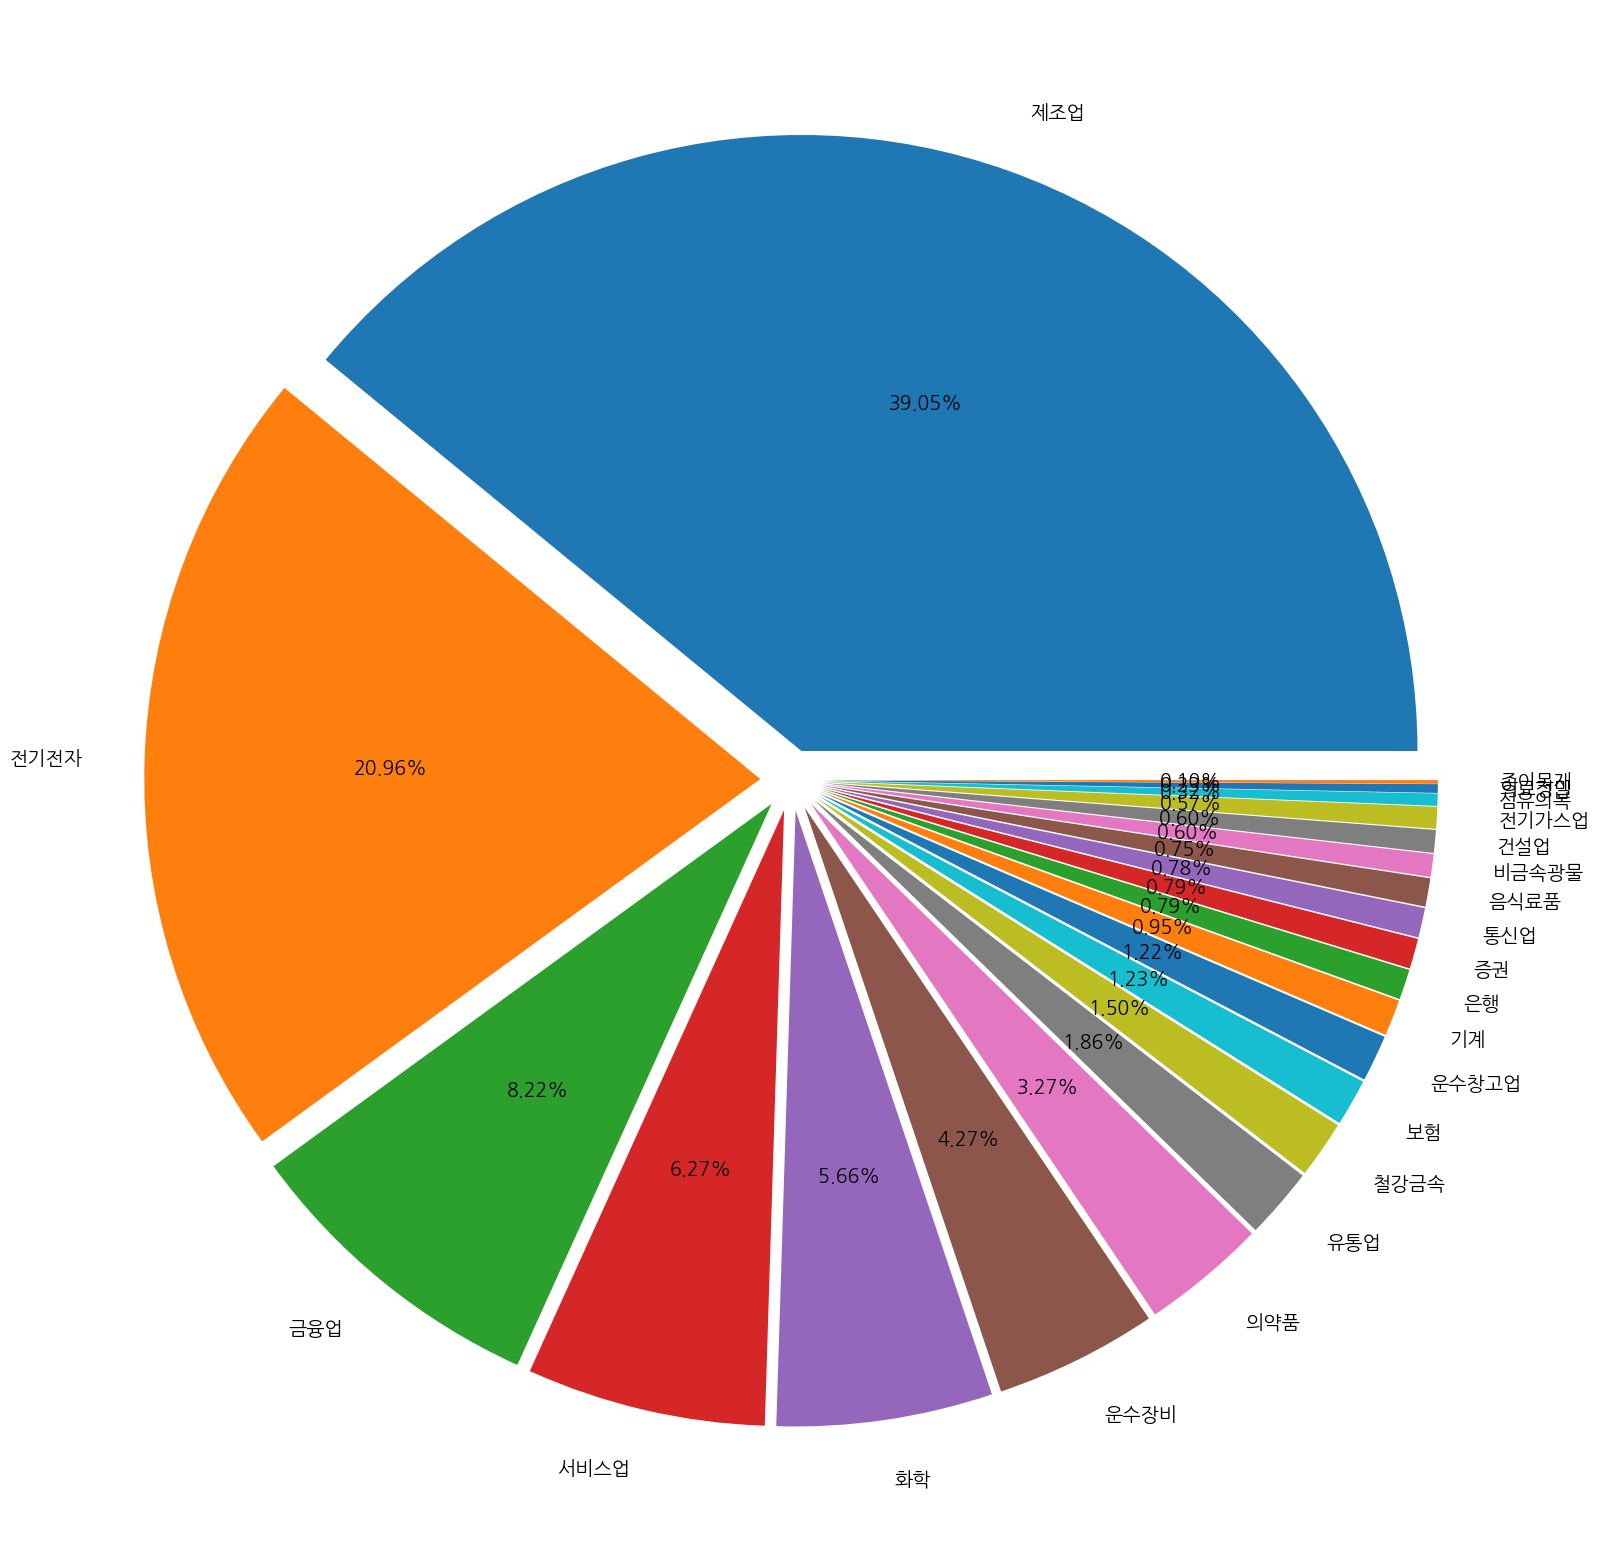

In [215]:
# 시각화 - 파이차트
plt.pie(ratio, labels=labels, autopct='%.2f%%', explode= [0.05]*len(ratio),textprops={'fontsize': 14})
plt.show()

In [216]:
각_산업_시총_비중

,산업,비중
21,제조업,39.048357
8,전기전자,20.960367
16,금융업,8.219062
20,서비스업,6.272799
3,화학,5.662935
10,운수장비,4.273153
4,의약품,3.268049
11,유통업,1.864789
6,철강금속,1.503497
19,보험,1.233288


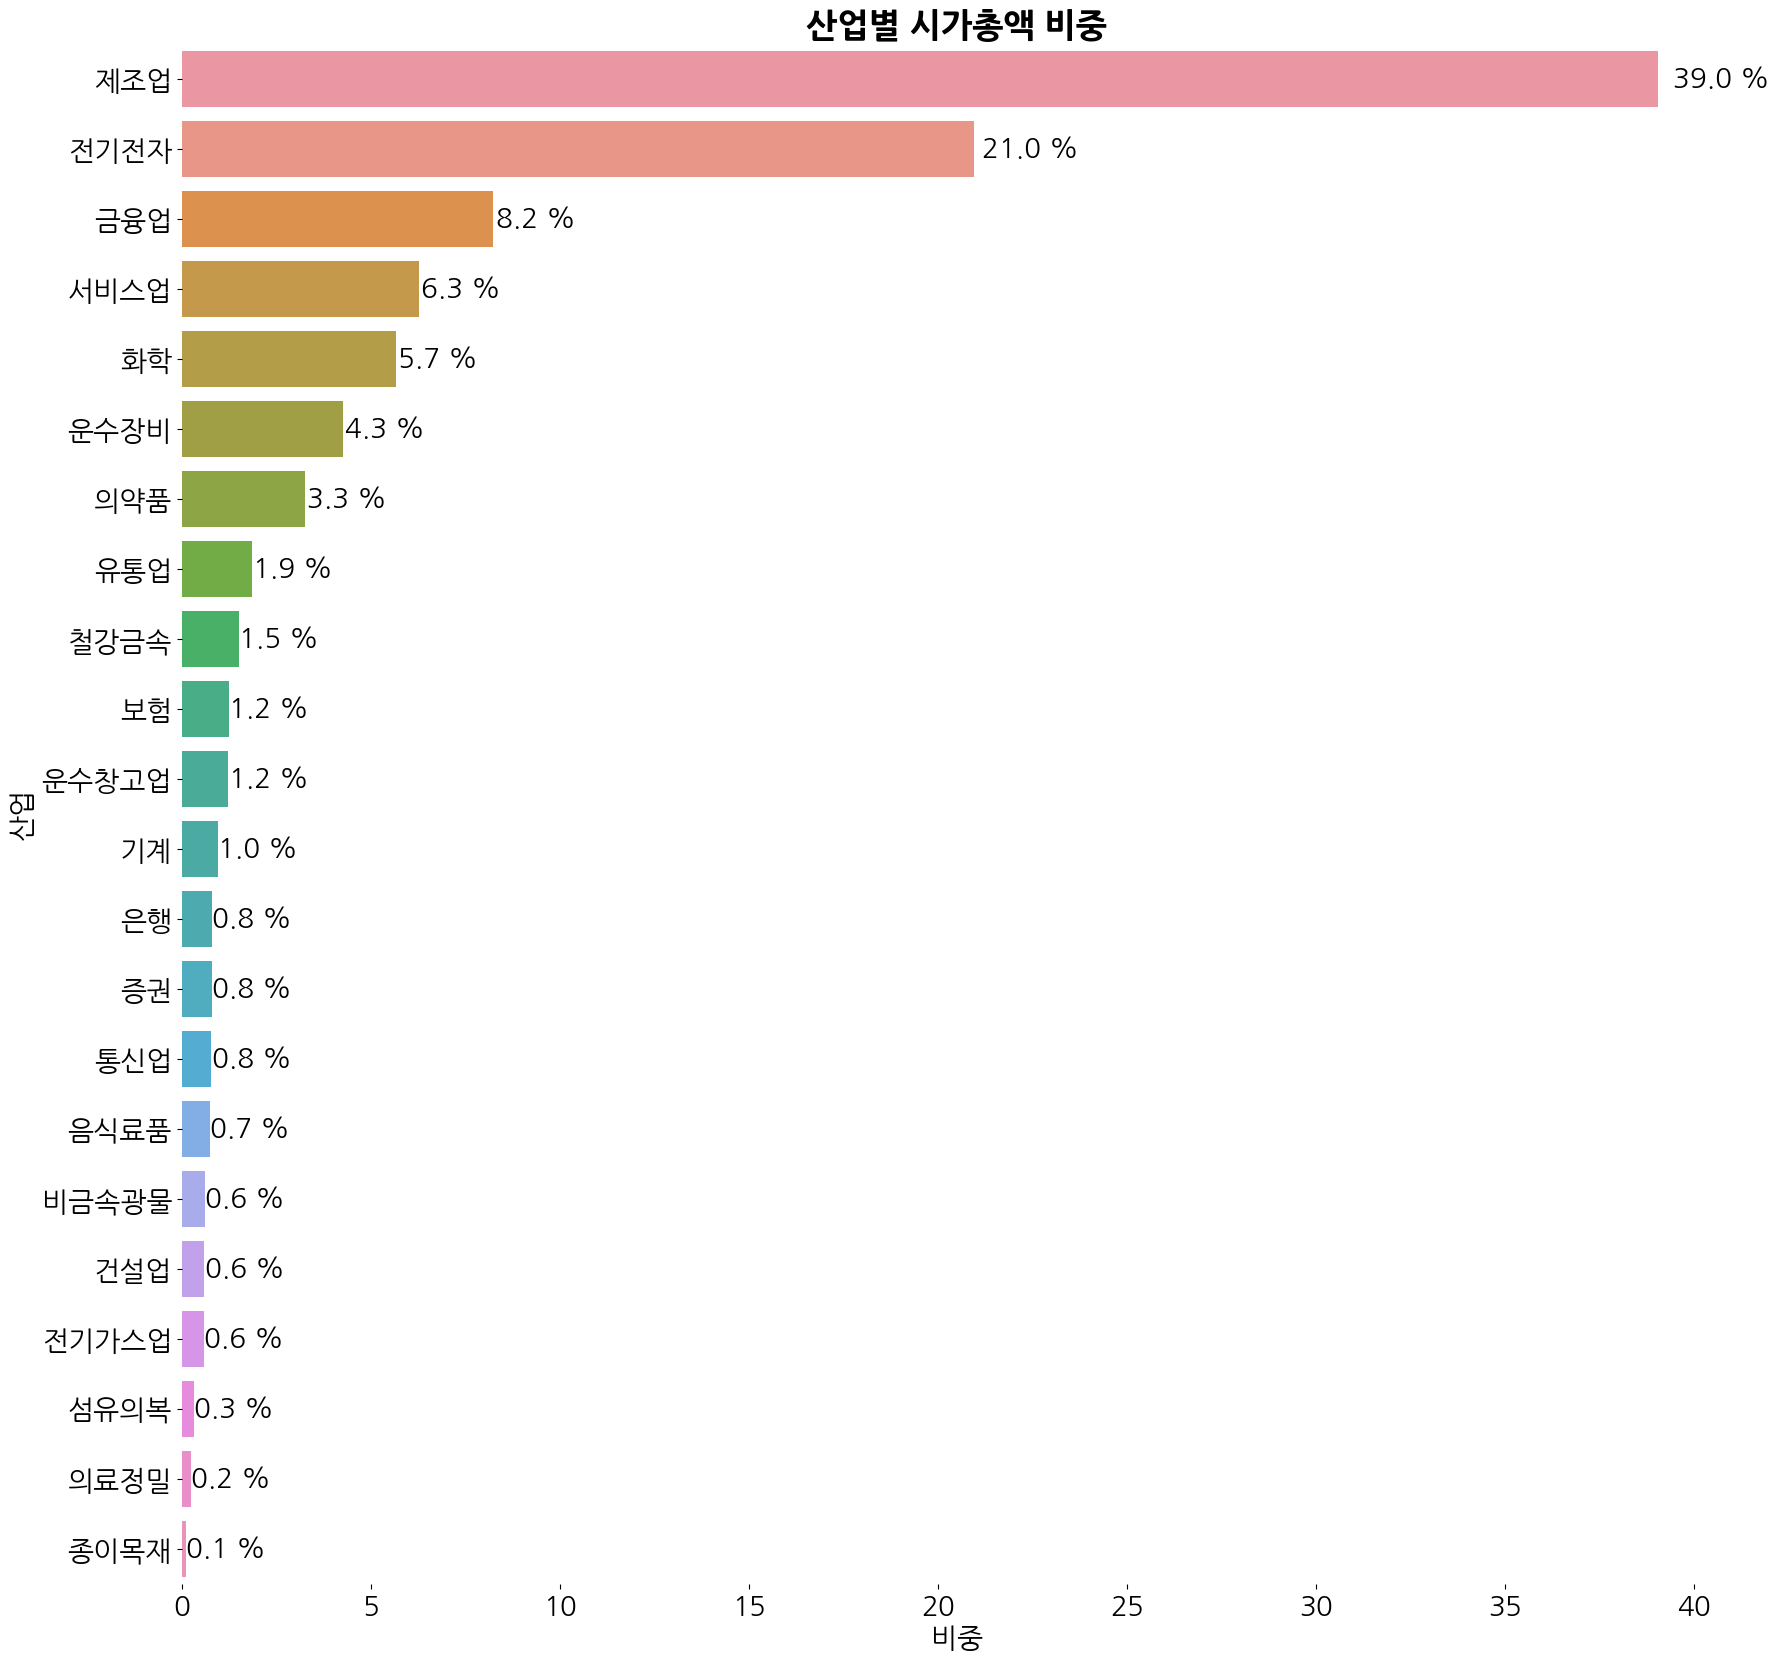

In [217]:
plt.rc('font', size=20)
plt.rc('legend', fontsize=20)

ax = sns.barplot(x = ratio, y=labels)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.1f %%"%(width), va='center')
plt.title('산업별 시가총액 비중',fontweight = 'bold')
plt.sca(ax)
plt.box(False)

plt.show()

# 코스피 대비 섹터 상관계수 line

# MDD bar 5년 or 10년

In [22]:
sec = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]
sec_name_5 = ['코스피_5', '음식료품_5', '섬유의복_5', '종이목재_5', '화학_5', '의약품_5', '비금속광물_5', '철강금속_5', '기계_5',
       '전기전자_5', '의료정밀_5', '운수장비_5', '유통업_5', '전기가스업_5', '건설업_5', '운수창고업_5', '통신업_5',
       '금융업_5', '은행_5', '증권_5', '보험_5', '서비스업_5', '제조업_5']

sec_5_dict = {}

In [23]:
for idx, name in enumerate(sec):
    sec_5_dict[sec_name_5[idx]] = round(get_mdd_5(name),3)


Int64Index([4989], dtype='int64')
Int64Index([10588], dtype='int64')
Int64Index([16185], dtype='int64')
Int64Index([21780], dtype='int64')
Int64Index([27377], dtype='int64')
Int64Index([32822], dtype='int64')
Int64Index([38571], dtype='int64')
Int64Index([44170], dtype='int64')
Int64Index([49767], dtype='int64')
Int64Index([55065], dtype='int64')
Int64Index([60959], dtype='int64')
Int64Index([66557], dtype='int64')
Int64Index([72155], dtype='int64')
Int64Index([77750], dtype='int64')
Int64Index([83347], dtype='int64')
Int64Index([88944], dtype='int64')
Int64Index([94543], dtype='int64')
Int64Index([100139], dtype='int64')
Int64Index([105735], dtype='int64')
Int64Index([111286], dtype='int64')
Int64Index([116882], dtype='int64')
Int64Index([122478], dtype='int64')
Int64Index([128075], dtype='int64')


/tmp/ipykernel_2879/1605123512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['date_temp'] = x['date'].astype('datetime64')
/tmp/ipykernel_2879/1605123512.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=['date_temp'],inplace=True)
/tmp/ipykernel_2879/1605123512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [24]:
sec_5_dict

{'코스피_5': -44.79,
 '음식료품_5': -49.34,
 '섬유의복_5': -52.04,
 '종이목재_5': -57.82,
 '화학_5': -56.16,
 '의약품_5': -53.03,
 '비금속광물_5': -57.36,
 '철강금속_5': -65.09,
 '기계_5': -61.26,
 '전기전자_5': -34.17,
 '의료정밀_5': -67.3,
 '운수장비_5': -56.84,
 '유통업_5': -53.82,
 '전기가스업_5': -62.42,
 '건설업_5': -67.31,
 '운수창고업_5': -50.81,
 '통신업_5': -44.96,
 '금융업_5': -62.88,
 '은행_5': -64.72,
 '증권_5': -62.59,
 '보험_5': -71.24,
 '서비스업_5': -37.07,
 '제조업_5': -40.06}

In [25]:
sec = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]
sec_name_10 = ['코스피_10', '음식료품_10', '섬유의복_10', '종이목재_10', '화학_10', '의약품_10', '비금속광물_10', '철강금속_10', '기계_10',
       '전기전자_10', '의료정밀_10', '운수장비_10', '유통업_10', '전기가스업_10', '건설업_10', '운수창고업_10', '통신업_10',
       '금융업_10', '은행_10', '증권_10', '보험_10', '서비스업_10', '제조업_10']

sec_10_dict = {}

In [26]:
for idx, name in enumerate(sec):
    sec_10_dict[sec_name_10[idx]] = round(get_mdd_10(name),3)

Int64Index([4989], dtype='int64')
Int64Index([10588], dtype='int64')
Int64Index([16185], dtype='int64')
Int64Index([21780], dtype='int64')
Int64Index([27377], dtype='int64')
Int64Index([31123], dtype='int64')
Int64Index([36787], dtype='int64')
Int64Index([44170], dtype='int64')
Int64Index([49767], dtype='int64')
Int64Index([54241], dtype='int64')
Int64Index([59181], dtype='int64')
Int64Index([66557], dtype='int64')
Int64Index([72155], dtype='int64')
Int64Index([77750], dtype='int64')
Int64Index([83347], dtype='int64')
Int64Index([88944], dtype='int64')
Int64Index([94543], dtype='int64')
Int64Index([100139], dtype='int64')
Int64Index([105735], dtype='int64')
Int64Index([111286], dtype='int64')
Int64Index([116882], dtype='int64')
Int64Index([120825], dtype='int64')
Int64Index([126954], dtype='int64')


/tmp/ipykernel_2879/455566816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['date_temp'] = x['date'].astype('datetime64')
/tmp/ipykernel_2879/455566816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(columns=['date_temp'],inplace=True)
/tmp/ipykernel_2879/455566816.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [27]:
df_mdd_5 = pd.DataFrame(data = sec_5_dict.values(), index = sec_5_dict.keys(), columns = ['MDD_5'])

In [28]:
(df_mdd_5 * -1).T

,코스피_5,음식료품_5,섬유의복_5,종이목재_5,화학_5,의약품_5,비금속광물_5,철강금속_5,기계_5,전기전자_5,...,전기가스업_5,건설업_5,운수창고업_5,통신업_5,금융업_5,은행_5,증권_5,보험_5,서비스업_5,제조업_5
MDD_5,44.79,49.34,52.04,57.82,56.16,53.03,57.36,65.09,61.26,34.17,...,62.42,67.31,50.81,44.96,62.88,64.72,62.59,71.24,37.07,40.06


In [29]:
df_mdd_10 = pd.DataFrame(data = sec_10_dict.values(), index = sec_10_dict.keys(), columns = ['MDD_10'])

In [152]:
df_mdd_5_modified = df_mdd_5 + 44.79
df_mdd_5_modified = df_mdd_5_modified.sort_values(by=['MDD_5'])

23

/home/lsg/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/lsg/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/lsg/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


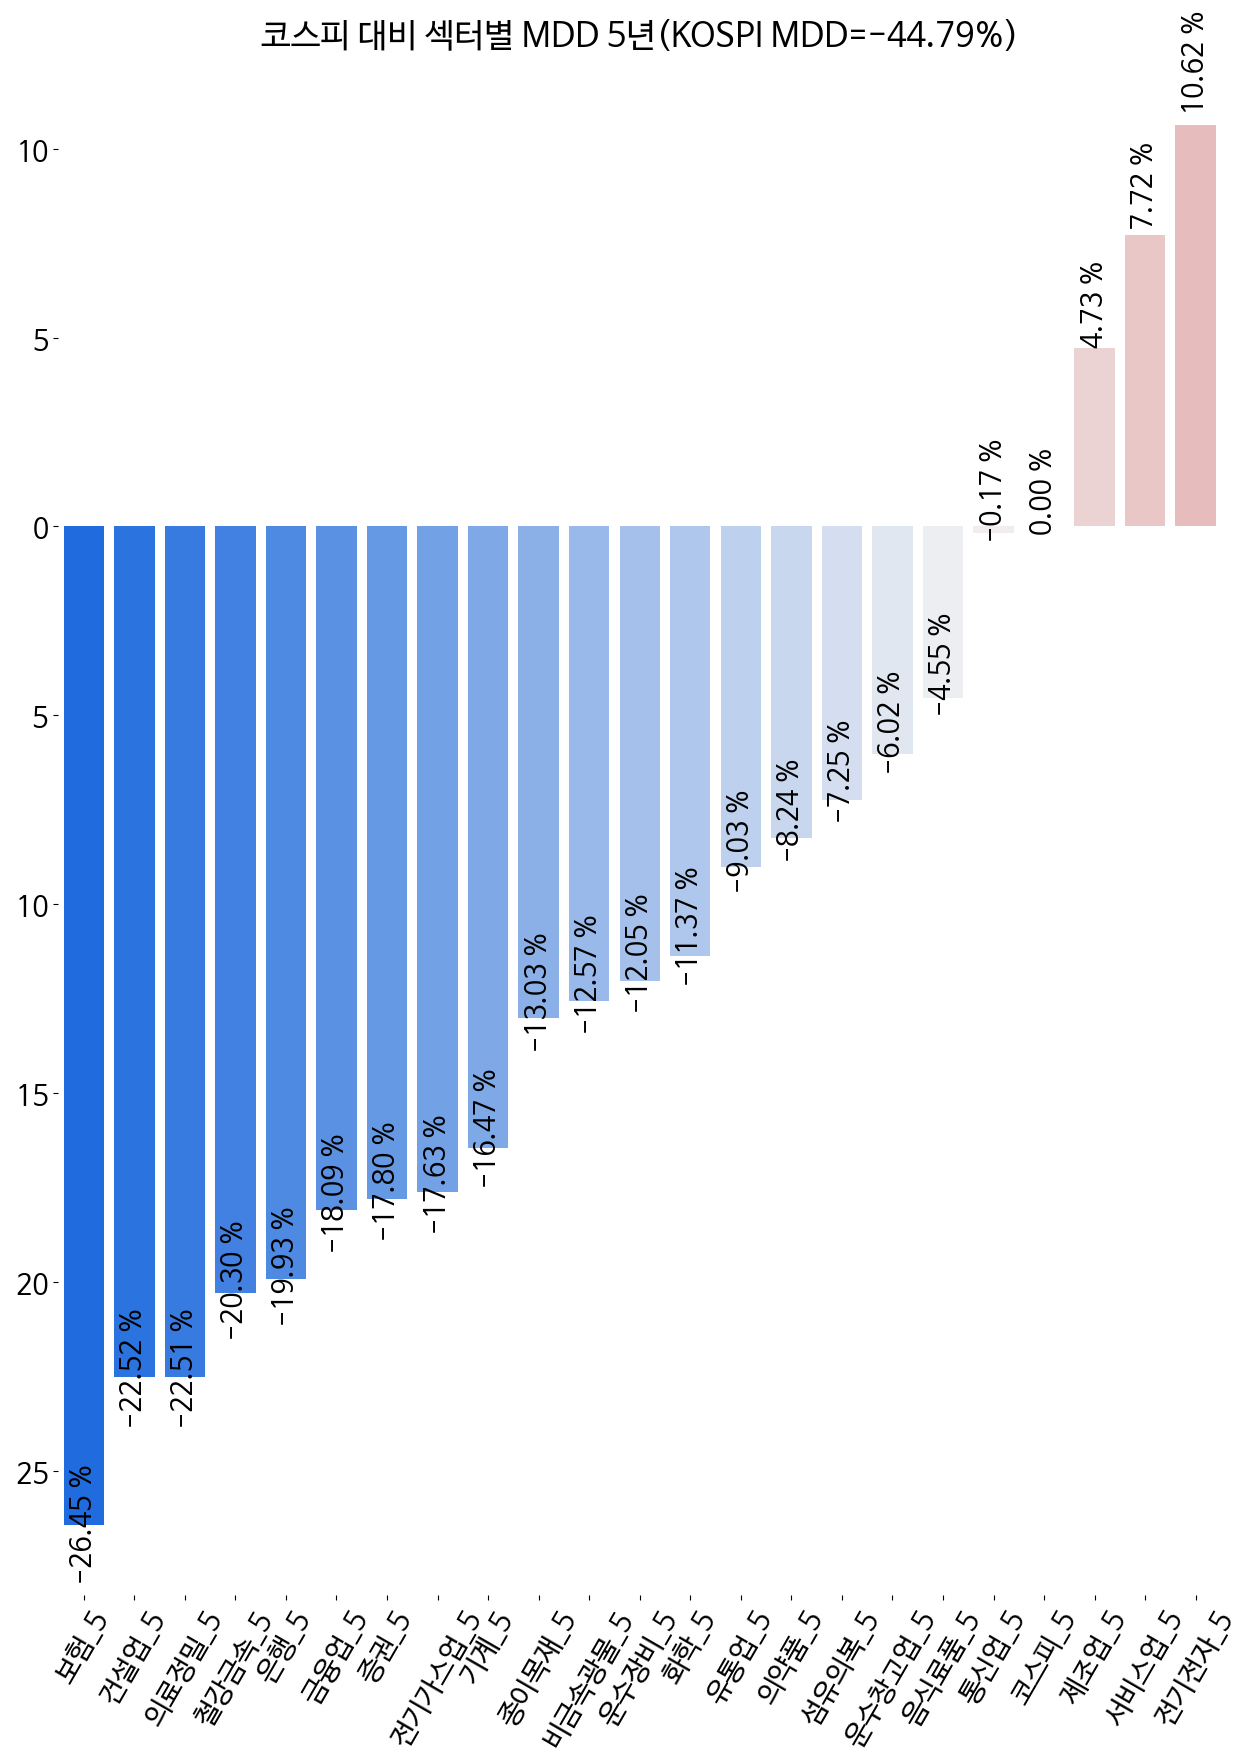

In [199]:
df_mdd_5_modified = df_mdd_5_modified.sort_values(by=['MDD_5'])
plt.rcParams['figure.figsize'] = (15, 20) 
_ = plt.xticks(rotation=60)
palette = sns.diverging_palette(250, 15, s=200, l=40,
                                  n=36, center="light")
ax = sns.barplot(data = df_mdd_5_modified.T, palette = palette)
plt.title("코스피 대비 섹터별 MDD 5년(KOSPI MDD=-44.79%)")
plt.sca(ax)
plt.box(False)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f %%"%(height), (left+width/2, height*1.05), ha='center',rotation=90)
    plt.rcParams['font.family'] = 'NanumBarunGothic'

/home/lsg/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


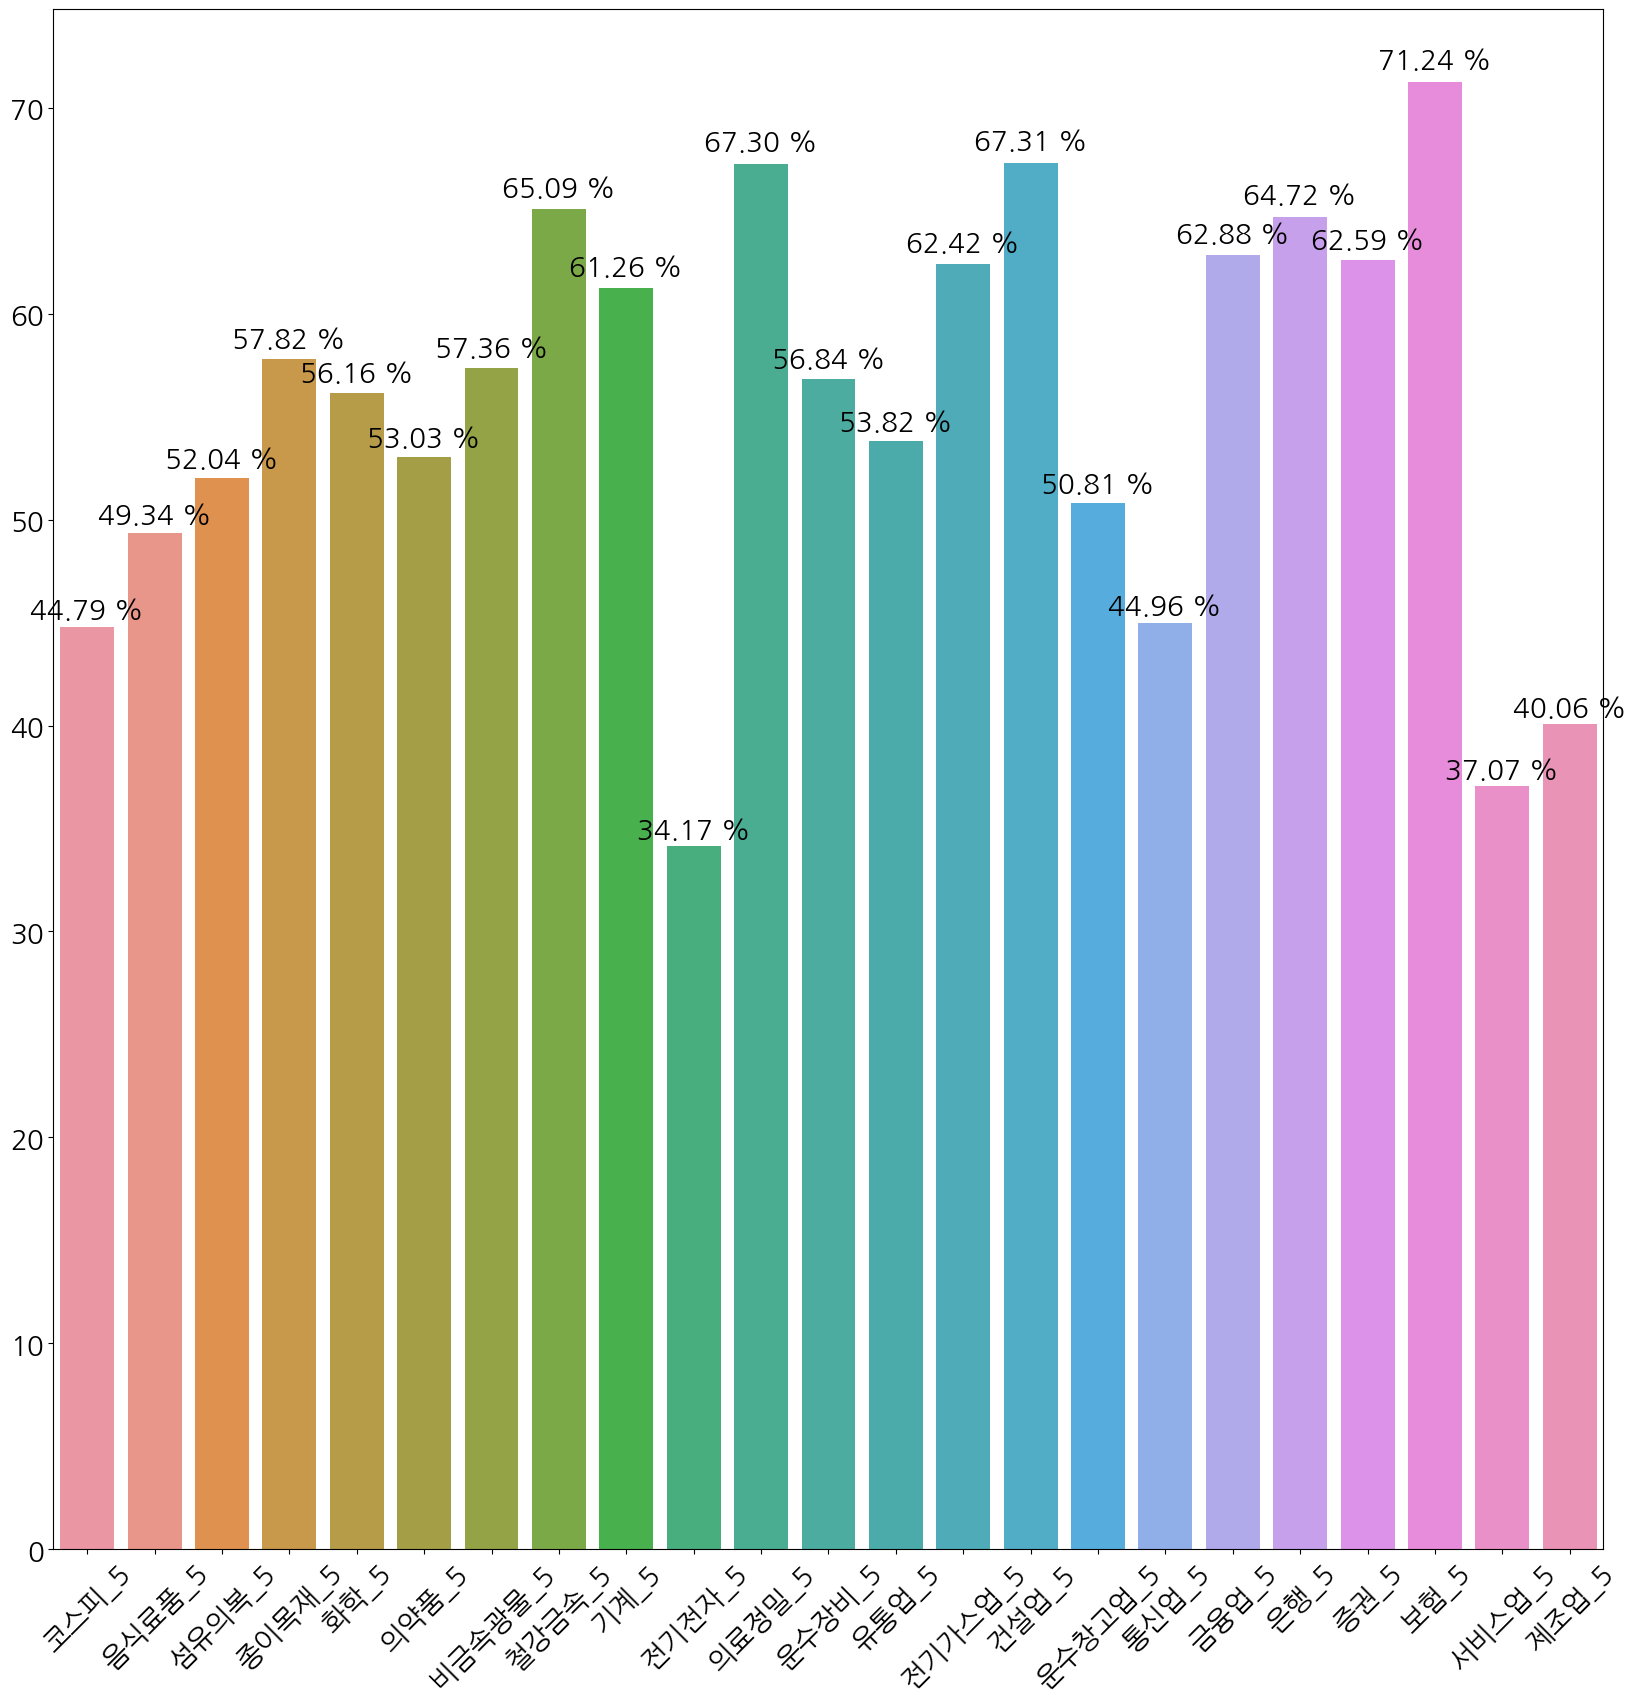

In [204]:
ax = sns.barplot((df_mdd_5 * -1).T)
_ = plt.xticks(rotation=45)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f %%"%(height), (left+width/2, height*1.01), ha='center')


In [162]:
df_mdd_10

,MDD_10
코스피_10,-44.79
음식료품_10,-61.39
섬유의복_10,-69.12
종이목재_10,-57.82
화학_10,-56.16
의약품_10,-2.20
비금속광물_10,-10.60
철강금속_10,-66.32
기계_10,-67.52
전기전자_10,-32.77


In [89]:
df_mdd_10_modified = df_mdd_10 + 44.79

/home/lsg/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/home/lsg/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/lsg/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


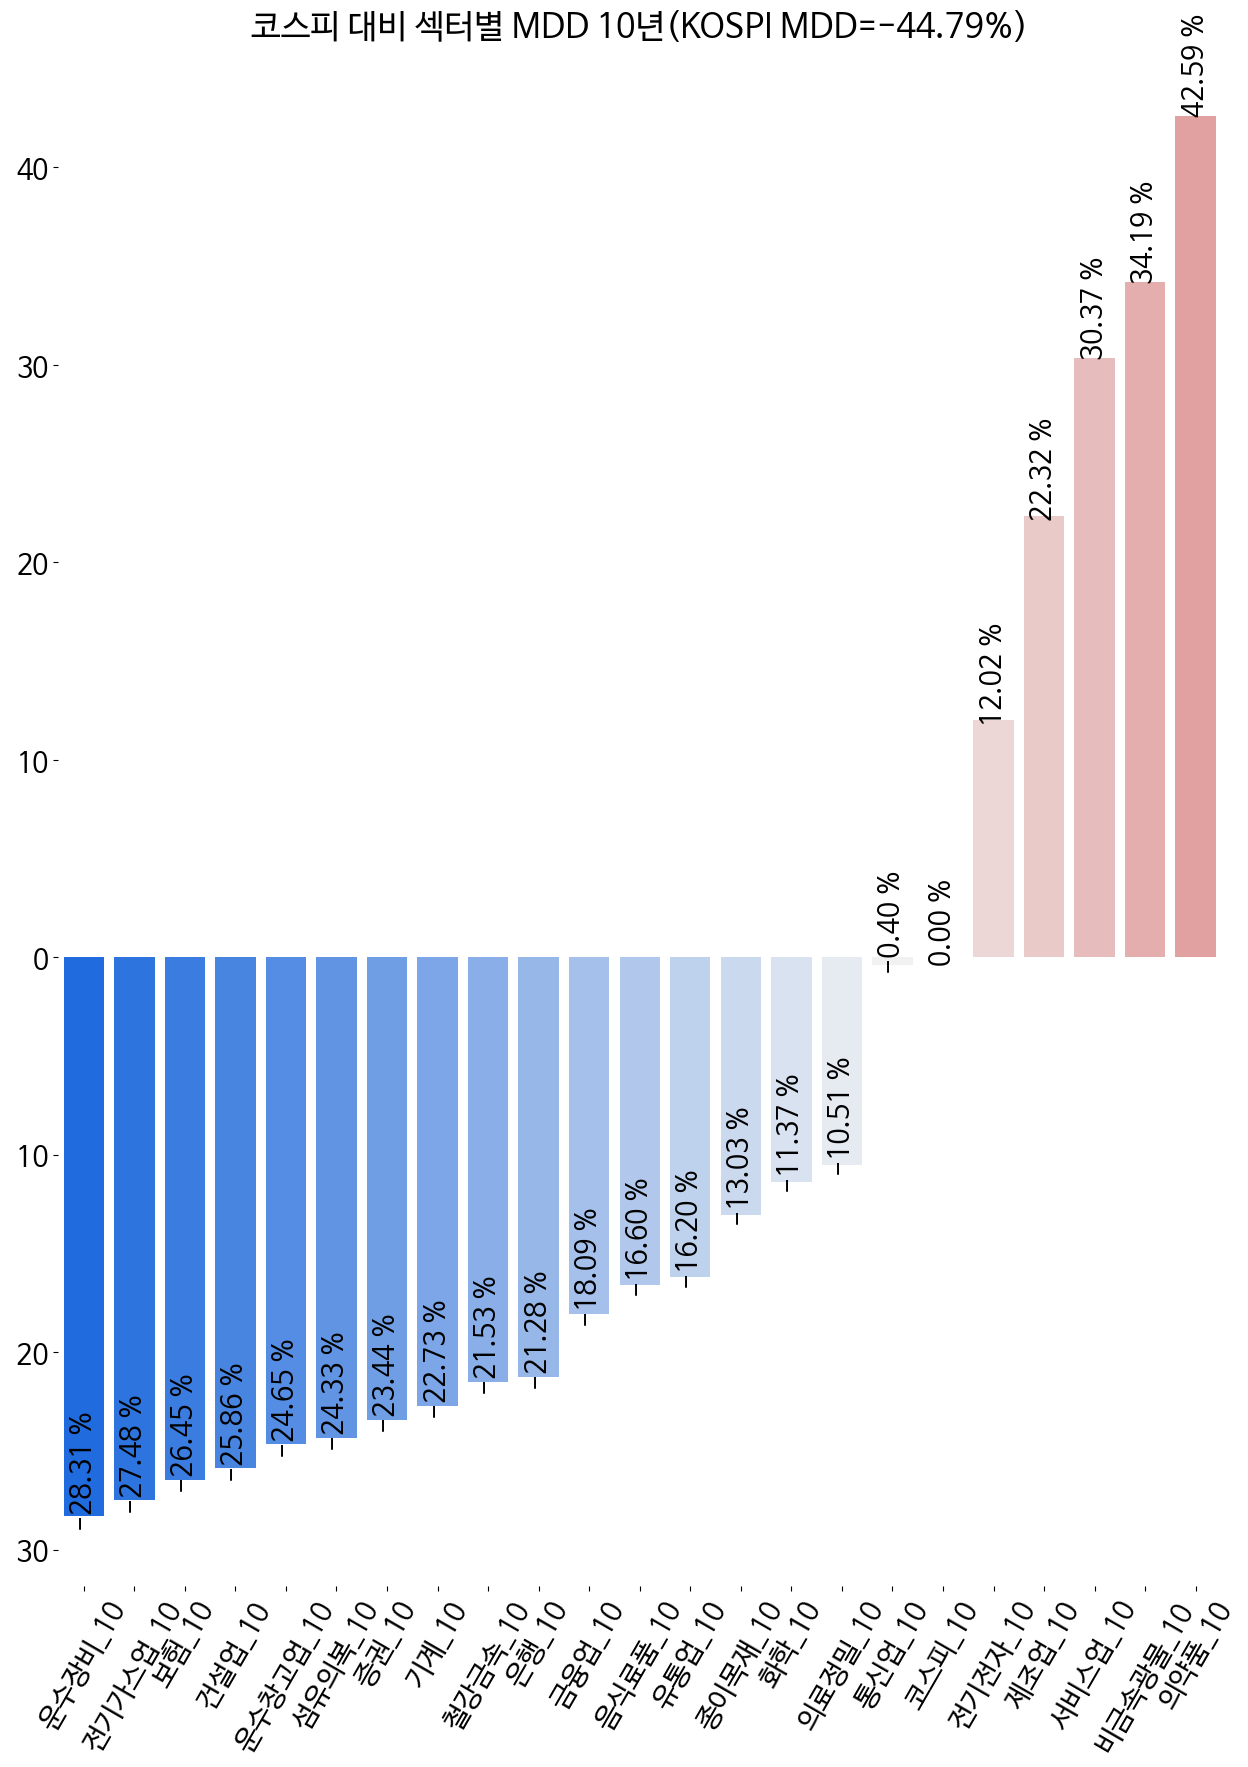

In [198]:
df_mdd_10_modified = df_mdd_10_modified.sort_values(by=['MDD_10'])
_ = plt.xticks(rotation=60)
palette = sns.diverging_palette(250, 15, s=200, l=40,
                                  n=33, center="light")
ax = sns.barplot(df_mdd_10_modified.T, palette = palette)
plt.title("코스피 대비 섹터별 MDD 10년(KOSPI MDD=-44.79%)")
plt.sca(ax)
plt.box(False)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.2f %%"%(height), (left+width/2, height*1.01), ha='center',rotation=90)
    plt.rcParams['font.family'] = 'NanumBarunGothic'

## 섹터별 상대 섹터와 상관계수 구하기

ex) 운수장비와 나머지 섹터들간의 상관계수 > 정렬 분산투자 및 헤징에 대한 인사이트 제공
sec_corr_dict = {}

for 섹터명 in 섹터이름:
    for 나머지_섹터명 in 나머지 섹터:
        sec_corr_dict[섹터명] = get_corr(섹터명, 나머지_섹터명)

최종적으로 각 섹터별 상대 섹터들과의 상관계수를 시각화 -1~1

In [241]:
df['sector_name'].unique()

array(['코스피', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업',
       '금융업', '은행', '증권', '보험', '서비스업', '제조업'], dtype=object)

In [263]:
sec_name = ['코스피', '음식료품', '섬유의복', '종이목재', '화학', '의약품', '비금속광물', '철강금속', '기계',
       '전기전자', '의료정밀', '운수장비', '유통업', '전기가스업', '건설업', '운수창고업', '통신업',
       '금융업', '은행', '증권', '보험', '서비스업', '제조업']
sec = [코스피, 음식료품, 섬유의복, 종이목재, 화학, 의약품, 비금속광물, 철강금속, 기계,
       전기전자, 의료정밀, 운수장비, 유통업, 전기가스업, 건설업, 운수창고업, 통신업,
       금융업, 은행, 증권, 보험, 서비스업, 제조업]
sec_corr_dict = {}

for idx, i in enumerate(sec):
    for j in sec:
        temp_list.append(get_corr(i,j))
    sec_corr_dict[sec_name[idx]] = temp_list
    temp_list = []

[1.0]
[1.0, 0.654]
[1.0, 0.654, 0.577]
[1.0, 0.654, 0.577, 0.635]
[1.0, 0.654, 0.577, 0.635, 0.832]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706, 0.729]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706, 0.729, 0.851]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706, 0.729, 0.851, 0.602]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706, 0.729, 0.851, 0.602, 0.78]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706, 0.729, 0.851, 0.602, 0.78, 0.783]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706, 0.729, 0.851, 0.602, 0.78, 0.783, 0.538]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706, 0.729, 0.851, 0.602, 0.78, 0.783, 0.538, 0.707]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706, 0.729, 0.851, 0.602, 0.78, 0.783, 0.538, 0.707, 0.703]
[1.0, 0.654, 0.577, 0.635, 0.832, 0.537, 0.627, 0.706, 0.729, 0.851, 

[0.602, 0.439, 0.446, 0.512, 0.519, 0.429, 0.442, 0.386, 0.494, 0.518, 1.0, 0.461, 0.519, 0.29, 0.453, 0.499, 0.314]
[0.602, 0.439, 0.446, 0.512, 0.519, 0.429, 0.442, 0.386, 0.494, 0.518, 1.0, 0.461, 0.519, 0.29, 0.453, 0.499, 0.314, 0.485]
[0.602, 0.439, 0.446, 0.512, 0.519, 0.429, 0.442, 0.386, 0.494, 0.518, 1.0, 0.461, 0.519, 0.29, 0.453, 0.499, 0.314, 0.485, 0.367]
[0.602, 0.439, 0.446, 0.512, 0.519, 0.429, 0.442, 0.386, 0.494, 0.518, 1.0, 0.461, 0.519, 0.29, 0.453, 0.499, 0.314, 0.485, 0.367, 0.523]
[0.602, 0.439, 0.446, 0.512, 0.519, 0.429, 0.442, 0.386, 0.494, 0.518, 1.0, 0.461, 0.519, 0.29, 0.453, 0.499, 0.314, 0.485, 0.367, 0.523, 0.396]
[0.602, 0.439, 0.446, 0.512, 0.519, 0.429, 0.442, 0.386, 0.494, 0.518, 1.0, 0.461, 0.519, 0.29, 0.453, 0.499, 0.314, 0.485, 0.367, 0.523, 0.396, 0.533]
[0.602, 0.439, 0.446, 0.512, 0.519, 0.429, 0.442, 0.386, 0.494, 0.518, 1.0, 0.461, 0.519, 0.29, 0.453, 0.499, 0.314, 0.485, 0.367, 0.523, 0.396, 0.533, 0.594]
[0.78]
[0.78, 0.496]
[0.78, 0.496,

[0.778, 0.616, 0.552, 0.596, 0.716]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533, 0.635]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533, 0.635, 0.578]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533, 0.635, 0.578, 0.533]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533, 0.635, 0.578, 0.533, 0.596]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533, 0.635, 0.578, 0.533, 0.596, 0.685]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533, 0.635, 0.578, 0.533, 0.596, 0.685, 0.387]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533, 0.635, 0.578, 0.533, 0.596, 0.685, 0.387, 0.602]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533, 0.635, 0.578, 0.533, 0.596, 0.685, 0.387, 0.602, 0.601]
[0.778, 0.616, 0.552, 0.596, 0.716, 0.53, 0.555, 0.533, 0.635, 0.578, 0.533, 0.596, 0.685, 0.387, 0.602, 0.601, 0.421

In [267]:
상관계수 = pd.DataFrame(sec_corr_dict, index = sec_name)

In [270]:
상관계수.reset_index(names=['상대섹터'])

,상대섹터,코스피,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,...,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업,제조업
0,코스피,1.000,0.654,0.577,0.635,0.832,0.537,0.627,0.706,0.729,...,0.538,0.707,0.703,0.580,0.815,0.667,0.772,0.665,0.778,0.969
1,음식료품,0.654,1.000,0.543,0.566,0.617,0.504,0.556,0.469,0.577,...,0.414,0.529,0.555,0.399,0.563,0.450,0.530,0.503,0.616,0.604
2,섬유의복,0.577,0.543,1.000,0.586,0.546,0.454,0.516,0.404,0.545,...,0.320,0.504,0.525,0.317,0.496,0.382,0.509,0.431,0.552,0.540
3,종이목재,0.635,0.566,0.586,1.000,0.596,0.488,0.591,0.456,0.602,...,0.334,0.592,0.594,0.329,0.561,0.439,0.579,0.460,0.596,0.599
4,화학,0.832,0.617,0.546,0.596,1.000,0.502,0.599,0.639,0.683,...,0.419,0.645,0.638,0.408,0.663,0.528,0.654,0.554,0.716,0.811
5,의약품,0.537,0.504,0.454,0.488,0.502,1.000,0.437,0.344,0.449,...,0.278,0.403,0.422,0.287,0.414,0.314,0.447,0.349,0.530,0.514
6,비금속광물,0.627,0.556,0.516,0.591,0.599,0.437,1.000,0.487,0.592,...,0.382,0.613,0.532,0.360,0.540,0.425,0.534,0.430,0.555,0.584
7,철강금속,0.706,0.469,0.404,0.456,0.639,0.344,0.487,1.000,0.560,...,0.417,0.559,0.515,0.346,0.573,0.484,0.530,0.475,0.533,0.698
8,기계,0.729,0.577,0.545,0.602,0.683,0.449,0.592,0.560,1.000,...,0.383,0.679,0.622,0.343,0.614,0.486,0.627,0.505,0.635,0.699
9,전기전자,0.851,0.436,0.402,0.459,0.593,0.371,0.429,0.509,0.505,...,0.370,0.472,0.501,0.444,0.579,0.460,0.580,0.478,0.578,0.914


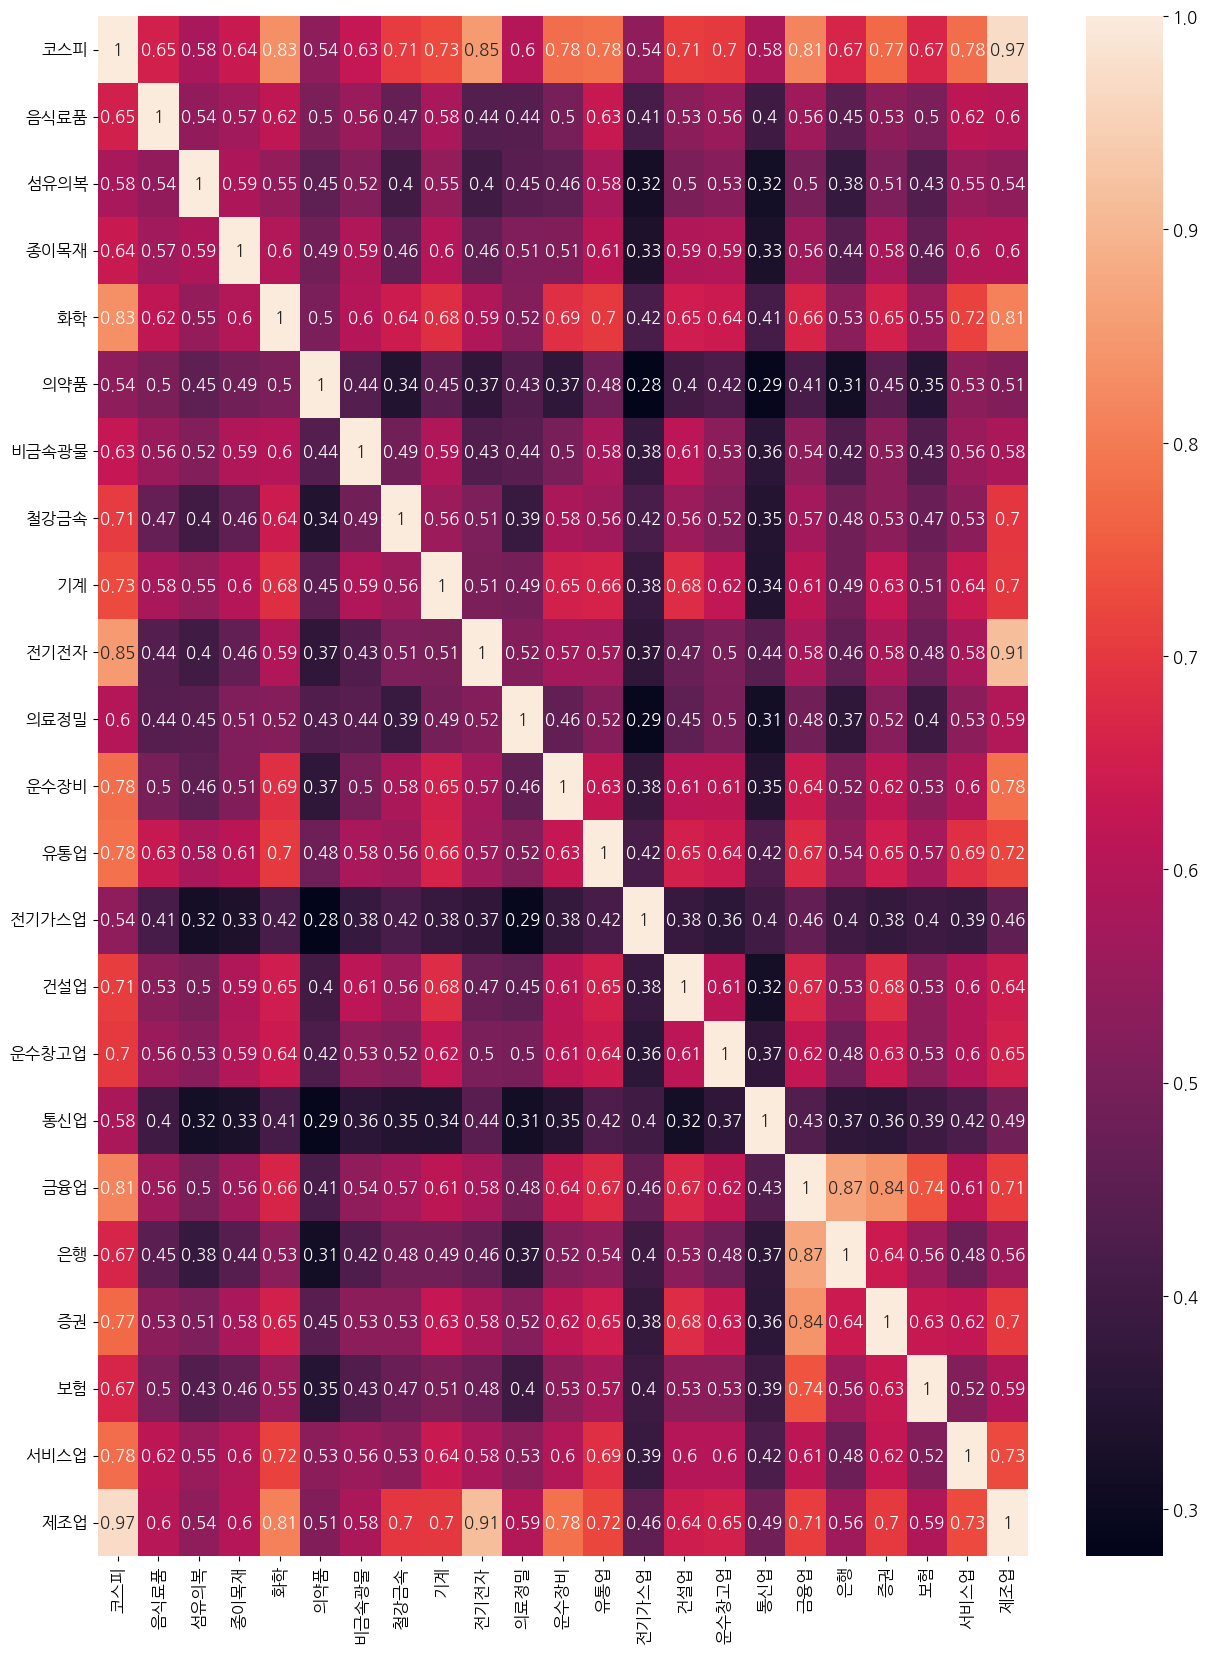

<Figure size 2000x2000 with 0 Axes>

In [293]:
sns.heatmap(data=상관계수, annot=True)
plt.figure(figsize=(20,20))
plt.rc('font', size=12)